# problématique 

Copier coller de l'énnoncé :
- Vous êtes data analyst dans un cabinet réputé spécialisé dans les métiers de la data. Les commerciaux disposent de données dans le monde entier et doivent déterminer où installer un nouveau bureau, afin de capter les profils les plus intéressants. Cette étude est cruciale et vous devez également fournir un bon moyen de récupérer le plus d'informations possible. Bonne chance !

Des questions : 

- Sur quel(s) profil(s), contrat(s) et localisation de l'entreprise privilégier ?
- Quelle est la principale tendance ?
- Fournir une analyse complète des différents types d'emplois dans le domaine des données.



La direction que je souhaite prendre afin de résoudre cette problémattique est la suivante : 

    - importer les données ici sous Python, 
    - faire une EDA afin de mieux comprendre la donnée, résoudre le soucis des valeurs manquantes, aberrantes etc,
    - une fois que j'établis un dataframe clean, passer sur Power BI et analyser tout ceci,
    - les conclusions de cette analyse seront divulgués par la suite  

## fonctions utilisées : implémentation des fonctions  

In [59]:
#description_dataframe
def description_dataframe(data) :

    print("description du dataframe")
    print(f"-colonnes : ", list(data.columns), "\n")

    print(f"- Infos du dataframe :")
    data.info()

    print("\n - Description du dataframe : ")
    print(data.describe())

    print("\n - Entetes (10 premières lignes) du dataframe : ")
    print(data.head(10))


In [60]:
# valuers nulles 
def null_v_df (data) : 
    valeur_null=0
    print(f"la dataframe, sa taille : {data.shape[0]} lignes et {data.shape[1]} colonnes ")
    for col in data.columns:
        valeur_null += data[col].isnull().sum()
        print(f"{col}: {valeur_null} valeurs nulles")

In [61]:
# bruits
def detect_bruits_bizarres(df, symbols_to_check=['%', '#', '@', '*', '$']):
    """
    Détecte les 'bruits bizarres' dans une DataFrame.
    
    Params:
    - df : DataFrame pandas
    - symbols_to_check : liste de symboles suspects à vérifier dans les colonnes texte
    
    Return:
    - Dictionnaire : colonnes → lignes suspectes (index + valeur)
    """
    bruits = {}

    for col in df.columns:
        # on convertit en string pour faciliter les recherches de patterns
        col_as_str = df[col].astype(str)

        # Conditions de "bruits bizarres"
        condition_nan_text = col_as_str.str.lower() == 'nan'
        condition_empty = col_as_str.str.strip() == ''
        condition_symbols = col_as_str.apply(lambda x: any(symb in x for symb in symbols_to_check))

        # Lignes qui matchent l'une des conditions
        mask_bruit = condition_nan_text | condition_empty | condition_symbols

        if mask_bruit.any():
            # On stocke uniquement les lignes concernées
            bruits[col] = df.loc[mask_bruit, col]

    return bruits


# 1- importation des bibliothèques nécessaires 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# 2 - analyse exploratoire des données 

## vérification de la qualité de données 

In [3]:
link_csv = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/refs/heads/main/datasets/ds_salaries%20-%20Vanilla.csv"

data_global = pd.read_csv("salaries.csv")

In [7]:
data_global

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,AI Research Scientist,75000,EUR,78947,BE,100,BE,L
1,2025,SE,FT,Data Architect,158000,USD,158000,US,0,US,M
2,2025,SE,FT,Data Architect,147000,USD,147000,US,0,US,M
3,2025,SE,FT,Machine Learning Engineer,225000,USD,225000,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,145000,USD,145000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
128563,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
128564,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
128565,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
128566,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


     - Infos :

In [14]:
description_dataframe(data_global)

description du dataframe
-colonnes :  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128568 entries, 0 to 128567
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           128568 non-null  int64 
 1   experience_level    128568 non-null  object
 2   employment_type     128568 non-null  object
 3   job_title           128568 non-null  object
 4   salary              128568 non-null  int64 
 5   salary_currency     128568 non-null  object
 6   salary_in_usd       128568 non-null  int64 
 7   employee_residence  128568 non-null  object
 8   remote_ratio        128568 non-null  int64 
 9   company_location    128568 non-null  object
 10  company_size        128568 non-null  object
dty

    - valeurs manquantes 

In [15]:
null_v_df(data_global)

la dataframe, sa taille : 128568 lignes et 11 colonnes 
work_year: 0 valeurs nulles
experience_level: 0 valeurs nulles
employment_type: 0 valeurs nulles
job_title: 0 valeurs nulles
salary: 0 valeurs nulles
salary_currency: 0 valeurs nulles
salary_in_usd: 0 valeurs nulles
employee_residence: 0 valeurs nulles
remote_ratio: 0 valeurs nulles
company_location: 0 valeurs nulles
company_size: 0 valeurs nulles


commentaire : étonnament il n'y a aucune valeur manquante dans les deux dataset

    - analyse exploratoire des données, distribution des données etc (valeurs abérrantes)

nous remarquons qu'il y a un salaire en usd et un salaire en devise local, voyons voir si le ratio salaire en USD / salaire en devise local est partout pareil ou non, pour une devise donnée ?

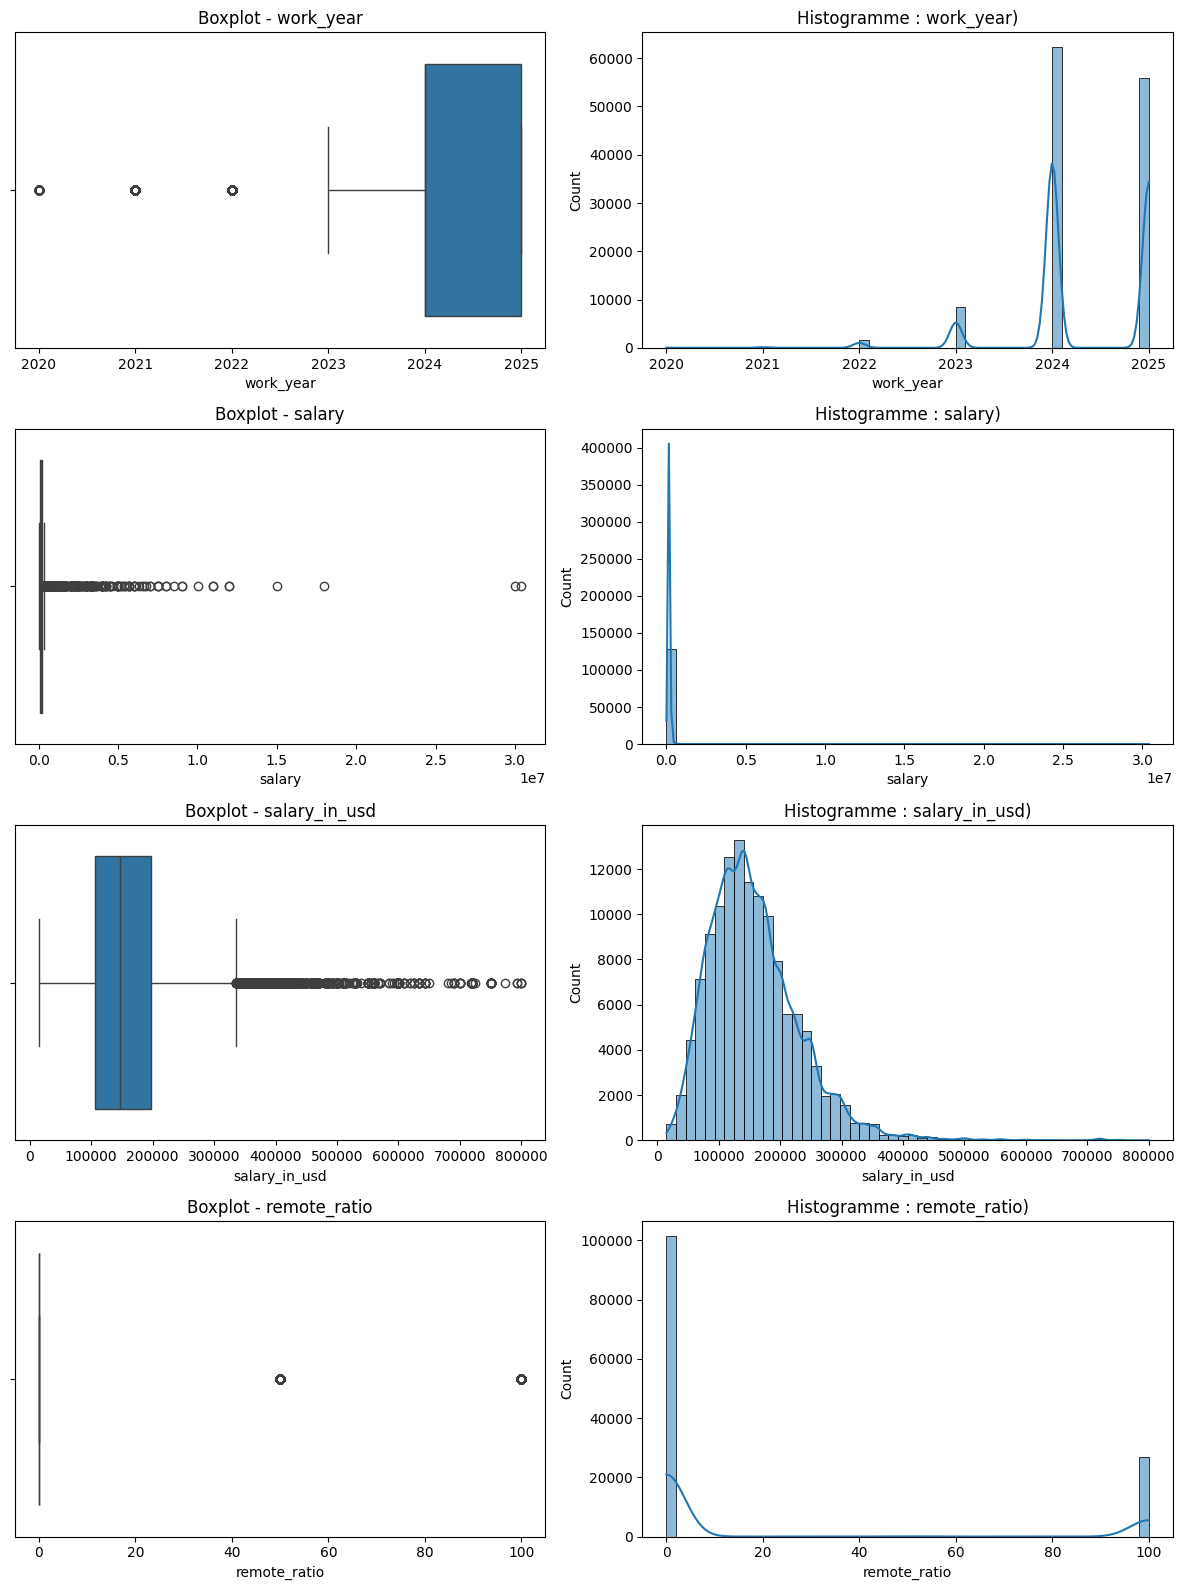

In [28]:
# nombre de colonnes
nb = len(data_global.select_dtypes(include='number').columns.tolist())

# subplots : 1 ligne par variable, 2 colonnes (boxplot, hist)
fig, axes = plt.subplots(nrows=nb, ncols=2, figsize=(12, 4 * nb))

for i, col in enumerate(data_global.select_dtypes(include='number').columns.tolist()):
    # Boxplot
    
    sns.boxplot(x=data_global[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot - {col}")
    
    # Histogramme 
    
    sns.histplot(data_global[col], bins=50, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Histogramme : {col})")


plt.tight_layout()
plt.show()

- problème, nous ne pourions pas voir la distribution, par devise, pour cela :

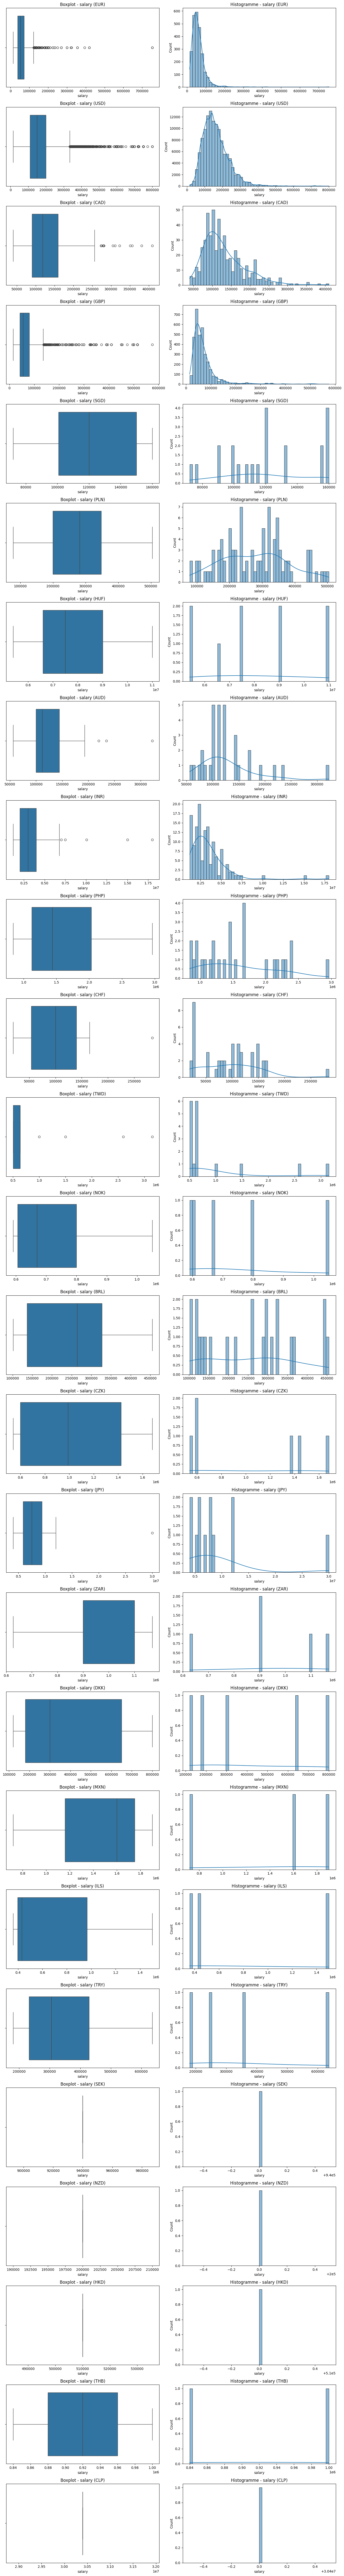

In [29]:
n = len(data_global['salary_currency'].unique().tolist())

# subplots : 1 ligne par devise, 2 colonnes
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 4 * n))

for i, currency in enumerate(data_global['salary_currency'].unique().tolist()):
    subset = data_global[data_global['salary_currency'] == currency]

    # boxplot du salaire pour cette devise
    sns.boxplot(x=subset['salary'], ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot - salary ({currency})")

    # histogramme du salaire pour cette devise
    sns.histplot(subset['salary'], bins=50, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Histogramme - salary ({currency})")

plt.tight_layout()
plt.show()

In [32]:
for devise in data_global['salary_currency'].unique().tolist() : 
    print(f'{devise} :')
    print(f'describe pour distribution par pas de 0.1 : ')
    print(data_global['salary'][data_global['salary_currency']==devise].describe(np.arange(0,1.1,0.1)))

EUR :
describe pour distribution par pas de 0.1 : 
count      2494.000000
mean      60070.358861
std       40553.749733
min       14000.000000
0%        14000.000000
10%       27600.000000
20%       36000.000000
30%       40000.000000
40%       46916.800000
50%       52500.000000
60%       60000.000000
70%       68400.000000
80%       78000.000000
90%       95804.400000
100%     753480.000000
max      753480.000000
Name: salary, dtype: float64
USD :
describe pour distribution par pas de 0.1 : 
count    121617.000000
mean     162170.640075
std       72608.316475
min       15000.000000
0%        15000.000000
10%       81944.400000
20%      102012.000000
30%      120000.000000
40%      136000.000000
50%      150000.000000
60%      168520.000000
70%      187415.000000
80%      214032.000000
90%      251673.200000
100%     800000.000000
max      800000.000000
Name: salary, dtype: float64
CAD :
describe pour distribution par pas de 0.1 : 
count       522.000000
mean     130444.614943
std    

**conclusion** : 

- salary :
    - Des extrêmes très élevés dans certaines devises
    - Une large variation des échélles, donc le groupmeent par salary_currency est indispensable 
- saslary USD : 
    - 800k$ ?? outliers ??

## gérer les outliers et valeurs abérrantes 

In [38]:
def nettoyer_outliers_par_devise(df):
    result = pd.DataFrame()

    for currency in df['salary_currency'].unique():
        subset = df[df['salary_currency'] == currency]

        # quantiles 10% et 99%
        q10 = subset['salary'].quantile(0.10)
        q99 = subset['salary'].quantile(0.99)

        # Filtrage
        filtered = subset[(subset['salary'] >= q10) & (subset['salary'] <= q99)]

        result = pd.concat([result, filtered], ignore_index=True)

    return result

In [36]:
def nettoyer_outliers_usd(df):
    q10 = df['salary_in_usd'].quantile(0.10)
    q99 = df['salary_in_usd'].quantile(0.99)
    return df[(df['salary_in_usd'] >= q10) & (df['salary_in_usd'] <= q99)]

In [39]:
data_global_clean = nettoyer_outliers_par_devise(data_global)
data_global_clean = nettoyer_outliers_usd(data_global_clean)

In [40]:

data_global_clean

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2025,SE,FT,Solution Architect,117600,EUR,123789,DE,0,DE,M
39,2025,MI,FT,Data Analist,95000,EUR,100000,NL,0,NL,M
63,2025,SE,FT,Machine Learning Engineer,180000,EUR,189473,DE,100,DE,M
64,2025,SE,FT,Machine Learning Engineer,110000,EUR,115789,DE,100,DE,M
103,2025,SE,FT,Analyst,115320,EUR,121389,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...
114368,2022,MI,FT,Machine Learning Engineer,100000,CHF,104697,CH,100,CH,L
114369,2022,MI,FT,Data Scientist,115000,CHF,120402,CH,0,CH,L
114425,2024,MI,FT,Business Insights Manager,650000,DKK,95588,DK,0,DK,L
114429,2024,MI,FT,Backend Software Engineer,432000,ILS,116756,IL,50,IL,L


In [41]:
print(data_global_clean.shape, data_global.shape)

(101896, 11) (128568, 11)


### vérification 

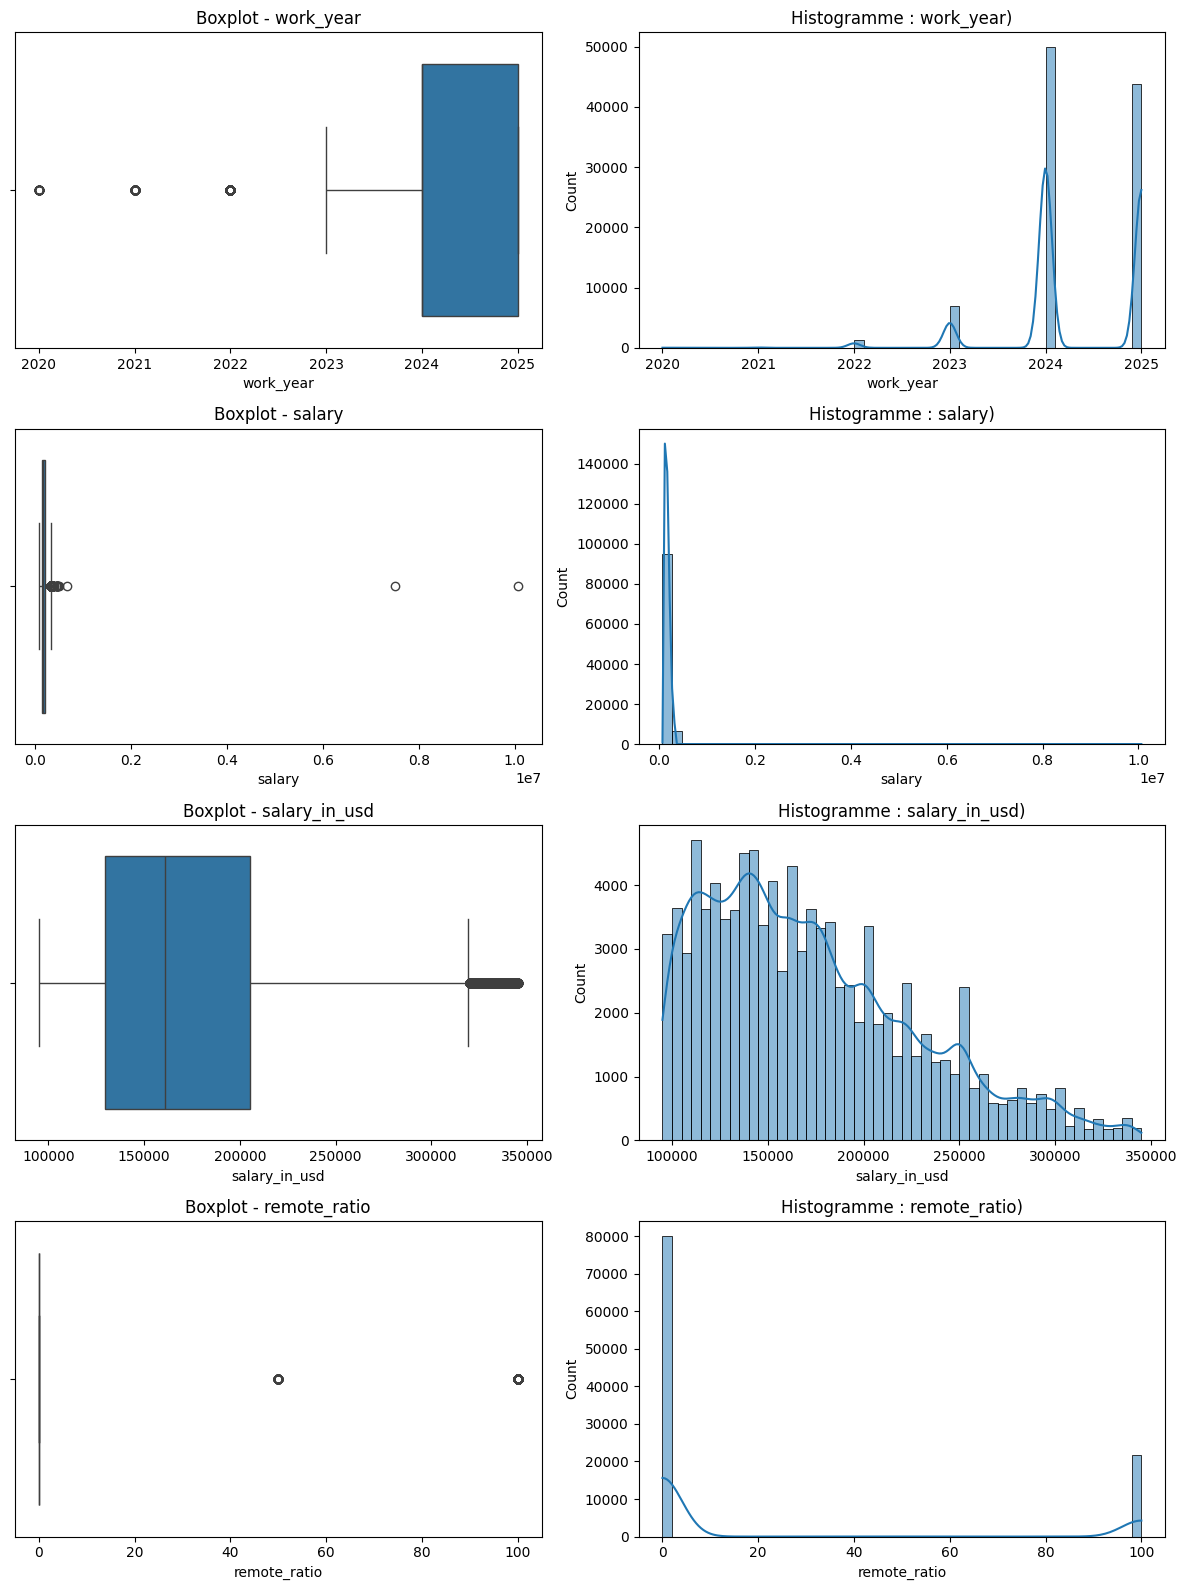

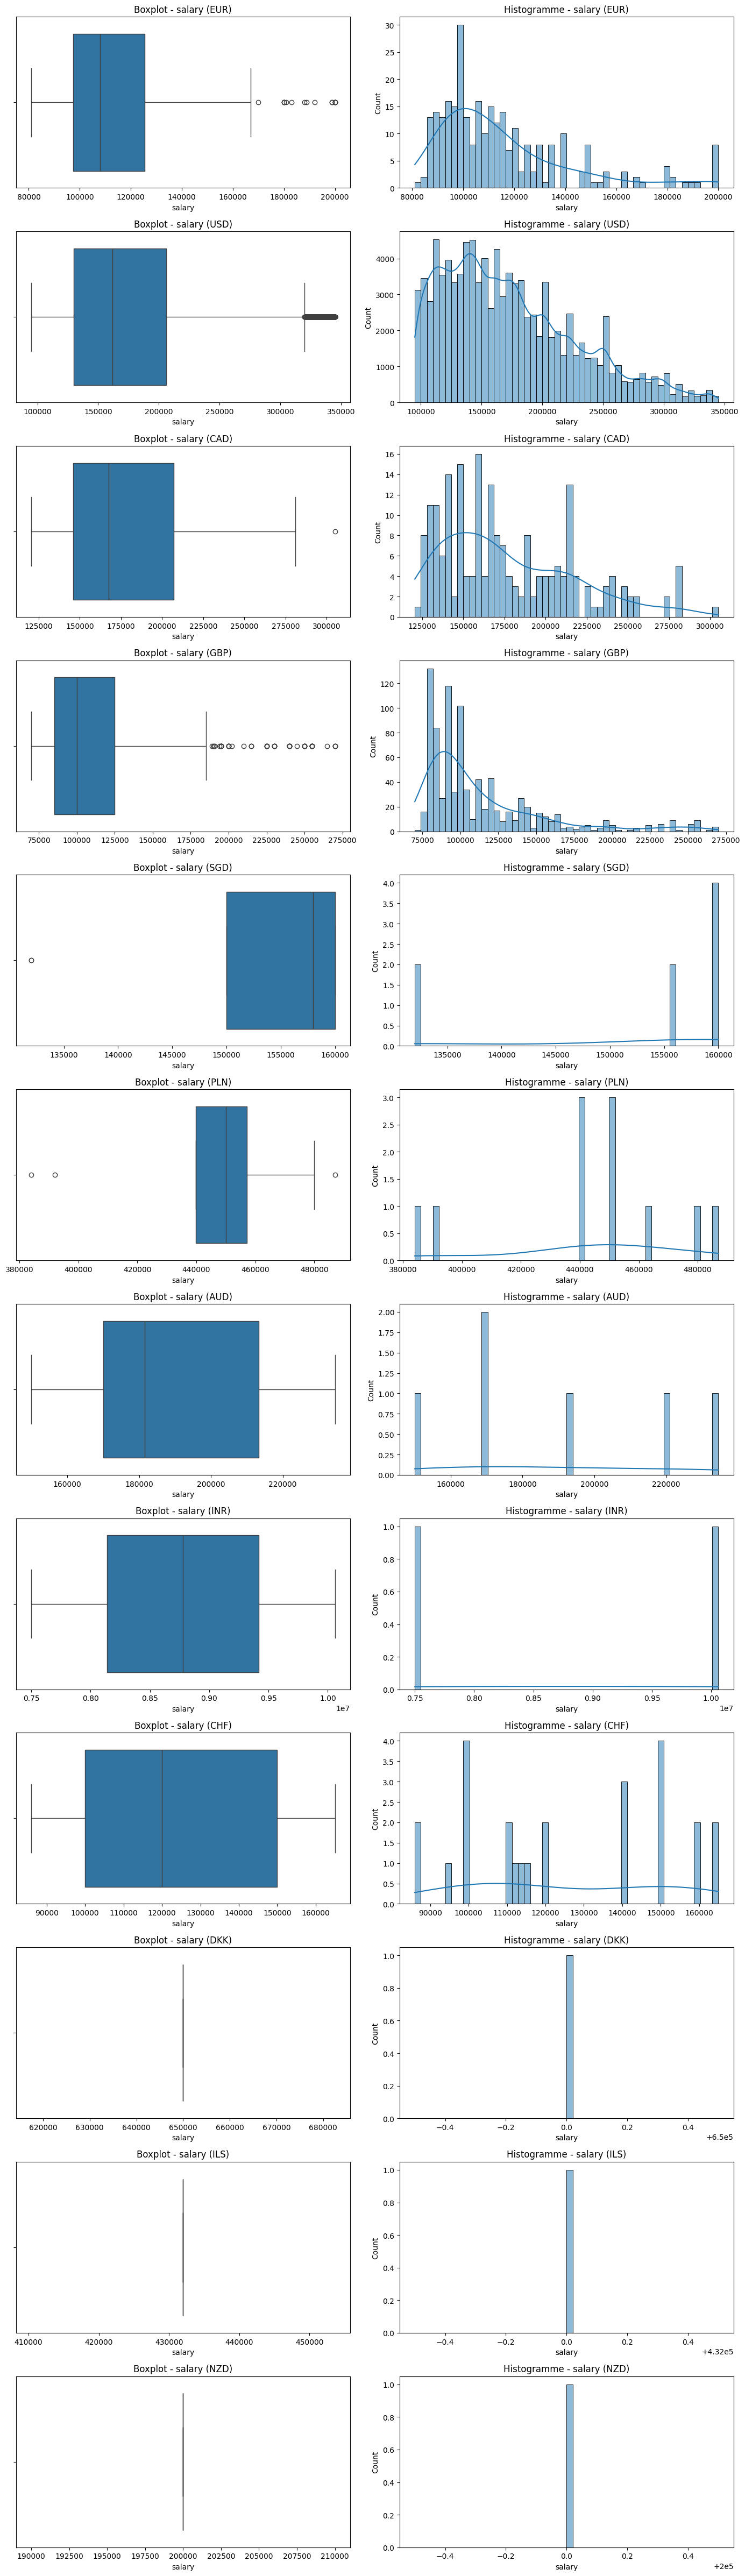

EUR :
describe pour distribution par pas de 0.1 : 
count       290.000000
mean     115587.355172
std       26518.420524
min       81000.000000
0%        81000.000000
10%       90000.000000
20%       95032.000000
30%      100000.000000
40%      102000.000000
50%      108000.000000
60%      113864.800000
70%      120000.000000
80%      130200.000000
90%      150000.000000
100%     200000.000000
max      200000.000000
Name: salary, dtype: float64
USD :
describe pour distribution par pas de 0.1 : 
count    100453.000000
mean     172866.570804
std       55015.532236
min       95000.000000
0%        95000.000000
10%      110000.000000
20%      122314.200000
30%      136000.000000
40%      148958.000000
50%      161700.000000
60%      177000.000000
70%      196400.000000
80%      220000.000000
90%      251000.000000
100%     345000.000000
max      345000.000000
Name: salary, dtype: float64
CAD :
describe pour distribution par pas de 0.1 : 
count       208.000000
mean     176929.480769
std    

In [42]:
# nombre de colonnes
nb = len(data_global_clean.select_dtypes(include='number').columns.tolist())

# subplots : 1 ligne par variable, 2 colonnes (boxplot, hist)
fig, axes = plt.subplots(nrows=nb, ncols=2, figsize=(12, 4 * nb))

for i, col in enumerate(data_global_clean.select_dtypes(include='number').columns.tolist()):
    # Boxplot
    
    sns.boxplot(x=data_global_clean[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot - {col}")
    
    # Histogramme 
    
    sns.histplot(data_global_clean[col], bins=50, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Histogramme : {col})")


plt.tight_layout()
plt.show()

n = len(data_global_clean['salary_currency'].unique().tolist())

# subplots : 1 ligne par devise, 2 colonnes
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 4 * n))

for i, currency in enumerate(data_global_clean['salary_currency'].unique().tolist()):
    subset = data_global_clean[data_global_clean['salary_currency'] == currency]

    # boxplot du salaire pour cette devise
    sns.boxplot(x=subset['salary'], ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot - salary ({currency})")

    # histogramme du salaire pour cette devise
    sns.histplot(subset['salary'], bins=50, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Histogramme - salary ({currency})")

plt.tight_layout()
plt.show()

for devise in data_global_clean['salary_currency'].unique().tolist() : 
    print(f'{devise} :')
    print(f'describe pour distribution par pas de 0.1 : ')
    print(data_global_clean['salary'][data_global_clean['salary_currency']==devise].describe(np.arange(0,1.1,0.1)))

## continuer 

In [46]:
liste_columns = data_global_clean.columns.tolist()
liste_columns_num = data_global_clean.select_dtypes(include='number').columns.tolist()
liste_columns_cat = []
for col in liste_columns : 
    if col not in liste_columns_num : 
        liste_columns_cat.append(col)
print(len(liste_columns), len(liste_columns_num), len(liste_columns_cat))

11 4 7


In [53]:
for col in liste_columns_cat :
    print(100*round(data_global_clean[col].value_counts(normalize=True), 4))

experience_level
SE    64.56
MI    27.79
EN     5.05
EX     2.60
Name: proportion, dtype: float64
employment_type
FT    99.71
CT     0.21
PT     0.08
FL     0.00
Name: proportion, dtype: float64
job_title
Data Scientist                      13.95
Software Engineer                   12.87
Data Engineer                       11.38
Engineer                             7.51
Machine Learning Engineer            7.23
                                    ...  
Business Intelligence Consultant     0.00
AI Engineering Manager               0.00
Business Insights Manager            0.00
Backend Software Engineer            0.00
Data Analyst Lead                    0.00
Name: proportion, Length: 343, dtype: float64
salary_currency
USD    98.58
GBP     0.87
EUR     0.28
CAD     0.20
CHF     0.02
PLN     0.01
SGD     0.01
AUD     0.01
INR     0.00
DKK     0.00
ILS     0.00
NZD     0.00
Name: proportion, dtype: float64
employee_residence
US    94.25
CA     3.42
GB     1.09
AU     0.38
DE     0.14
   

**conclusion** des colonnes catégorielles : 

    - très forte concentration sur le senior (>60%) 
    - > 99% sont en temps plein
    - titre de poste très hétérogène (certain poste sont rares : ex : AI Engineering Manager etc)
    - la plus part des salaires sont en $USD > 98 %
    - la plus part de résidence des employés sont en US
    - la plus part des compagnie sont  présente à 94 % au US
    - taille la plus répondue de l'entreprise est M >97%


identifions maintenant les familles de job

In [56]:
data_global_clean['job_title'].value_counts(normalize=True).head(30)

job_title
Data Scientist                    0.139456
Software Engineer                 0.128719
Data Engineer                     0.113792
Engineer                          0.075077
Machine Learning Engineer         0.072309
Data Analyst                      0.063319
Manager                           0.053820
Research Scientist                0.027489
Analyst                           0.023975
Applied Scientist                 0.020629
Product Manager                   0.019461
Data Architect                    0.016831
Analytics Engineer                0.015104
Associate                         0.013563
Research Engineer                 0.012837
AI Engineer                       0.012258
Consultant                        0.007125
Solutions Architect               0.007037
Machine Learning Researcher       0.006615
Engineering Manager               0.006104
Software Development Engineer     0.005928
Systems Engineer                  0.005888
Business Intelligence Engineer    0.005643
D

In [70]:
conditions = [
    data_global_clean['job_title'].str.contains(r'data scientist', case=False),
    data_global_clean['job_title'].str.contains(r'machine learning|ml', case=False),
    data_global_clean['job_title'].str.contains(r'data engineer|mlops|platform', case=False),
    data_global_clean['job_title'].str.contains(r'data analyst|business intelligence|bi', case=False),
    data_global_clean['job_title'].str.contains(r'software|developer|devops|systems engineer', case=False), #5
    data_global_clean['job_title'].str.contains(r'architect', case=False),
    data_global_clean['job_title'].str.contains(r'manager|lead|head|director|vp|principal', case=False),
    data_global_clean['job_title'].str.contains(r'product|consultant|specialist|associate', case=False),
    data_global_clean['job_title'].str.contains(r'analyst|research', case=False),
    data_global_clean['job_title'].str.contains(r'\bengineer\b$', case=False), #10
    data_global_clean['job_title'].str.contains(r'applied scientist', case=False),
    data_global_clean['job_title'].str.contains(r'analytics engineer', case=False),
    data_global_clean['job_title'].str.contains(r'ai engineer|computer vision', case=False),
    data_global_clean['job_title'].str.contains(r'solutions engineer|cloud engineer', case=False),
    data_global_clean['job_title'].str.contains(r'backend engineer|full stack', case=False), #15
    data_global_clean['job_title'].str.contains(r'data governance|data modeler', case=False),
    data_global_clean['job_title'].str.contains(r'decision scientist', case=False)
]

# labels associés
choices = [
    'Data Scientist',
    'ML / AI',
    'Data Engineer',
    'Data Analyst / BI',
    'Software / Dev', #5
    'Architect',
    'Manager / Lead',
    'Product / Consultant',
    'Analyst / Research',
    'General Engineer', #10
    'ML / AI',
    'Data Engineer',
    'ML / AI',
    'Architect',
    'Software / Dev', #15
    'Data Analyst / BI',
    'Data Scientist'
]

# application
data_global_clean['job_domaine'] = np.select(conditions, choices, default='Other')

In [71]:
round(data_global_clean['job_domaine'].value_counts(normalize=True), 2)

job_domaine
Software / Dev          0.16
Data Scientist          0.14
General Engineer        0.12
Data Engineer           0.12
ML / AI                 0.11
Manager / Lead          0.11
Data Analyst / BI       0.09
Analyst / Research      0.08
Architect               0.03
Product / Consultant    0.03
Other                   0.01
Name: proportion, dtype: float64

In [72]:
liste_columns = data_global_clean.columns.tolist()
liste_columns_num = data_global_clean.select_dtypes(include='number').columns.tolist()
liste_columns_cat = []
for col in liste_columns : 
    if col not in liste_columns_num : 
        liste_columns_cat.append(col)
print(len(liste_columns), len(liste_columns_num), len(liste_columns_cat))

12 4 8


analyse univarié :

    - colonne numérique, deja fait :)
    - colonne catégorielle, voir ci-après

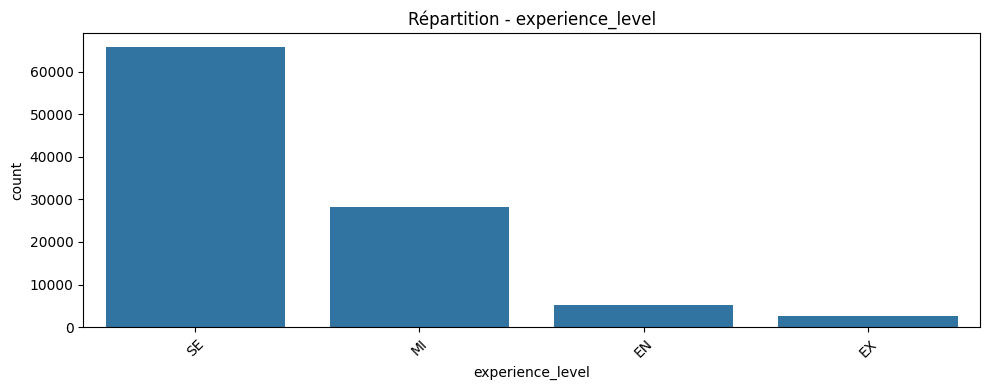

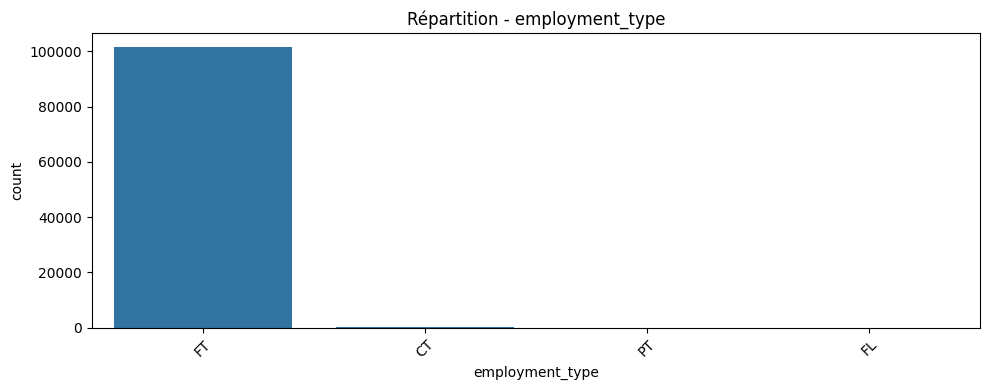

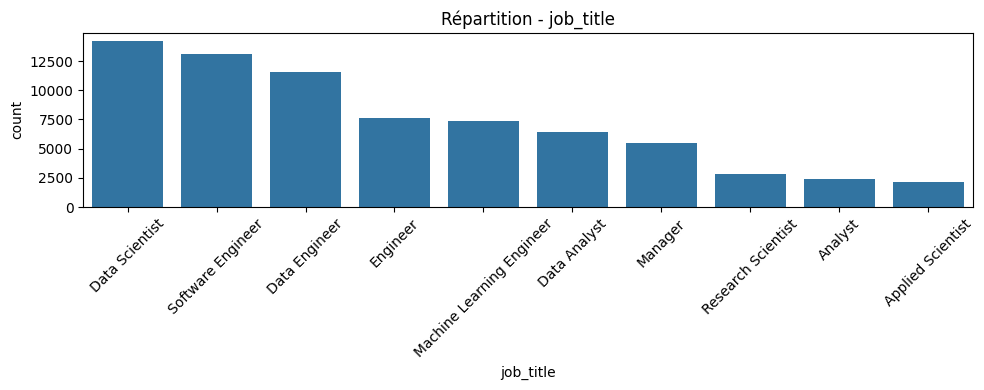

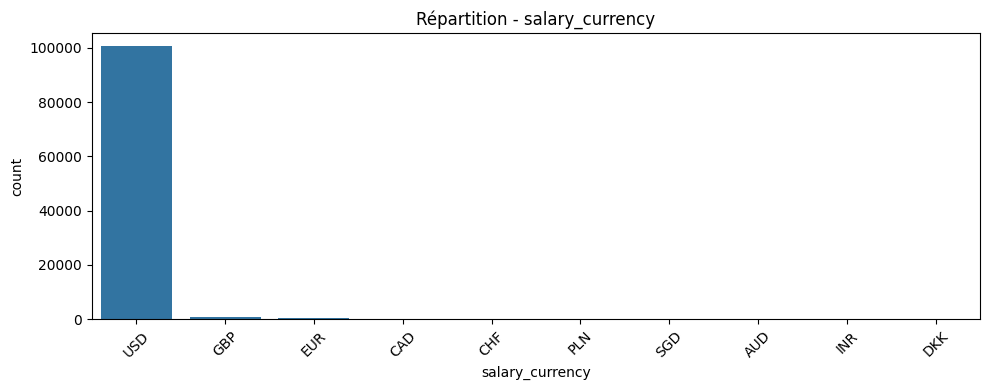

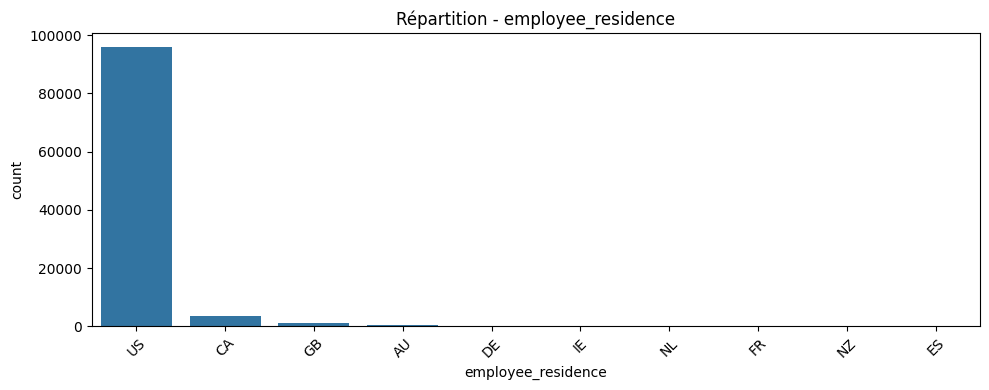

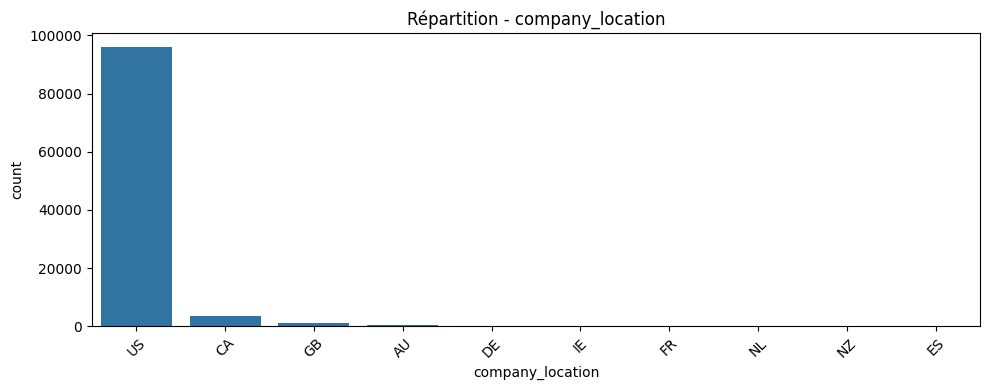

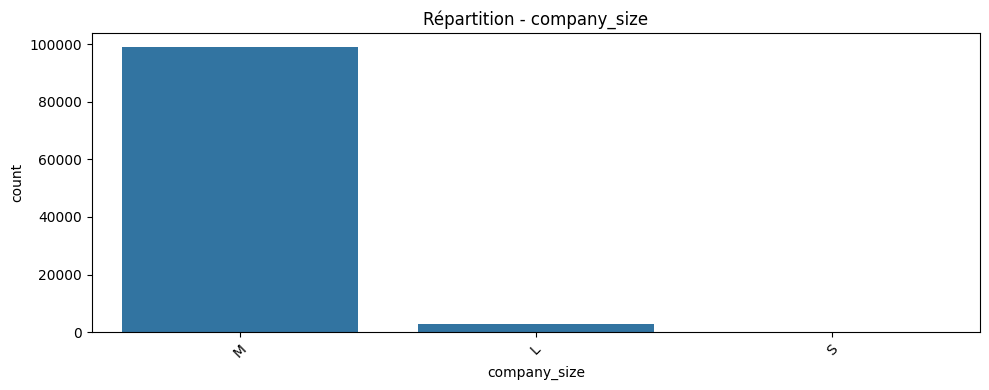

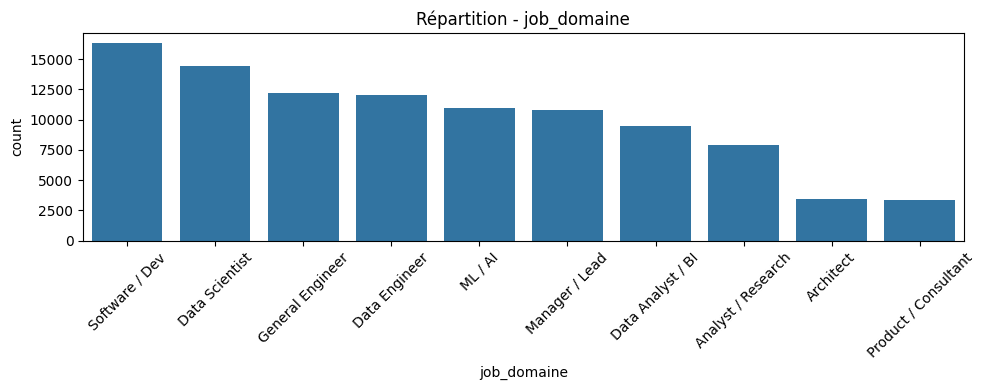

In [73]:
for col in liste_columns_cat:
    plt.figure(figsize=(10, 4))
    order = data_global_clean[col].value_counts().head(10).index
    sns.countplot(data=data_global_clean, 
                  x=col, 
                  order=order)
    plt.title(f"Répartition - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**analyse multivarié**

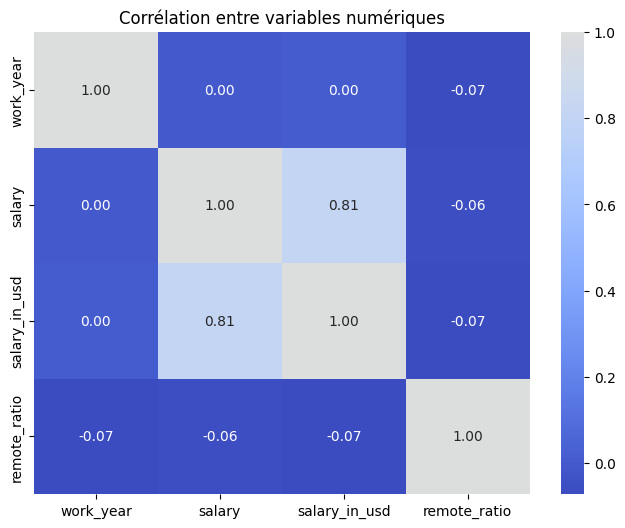

In [74]:
plt.figure(figsize=(8, 6))
corr = data_global_clean.select_dtypes(include='number').corr()
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            center=True,
            cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()

corrélation qu'entre salaire en devise du pays et $USD

In [75]:
liste_columns_num

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

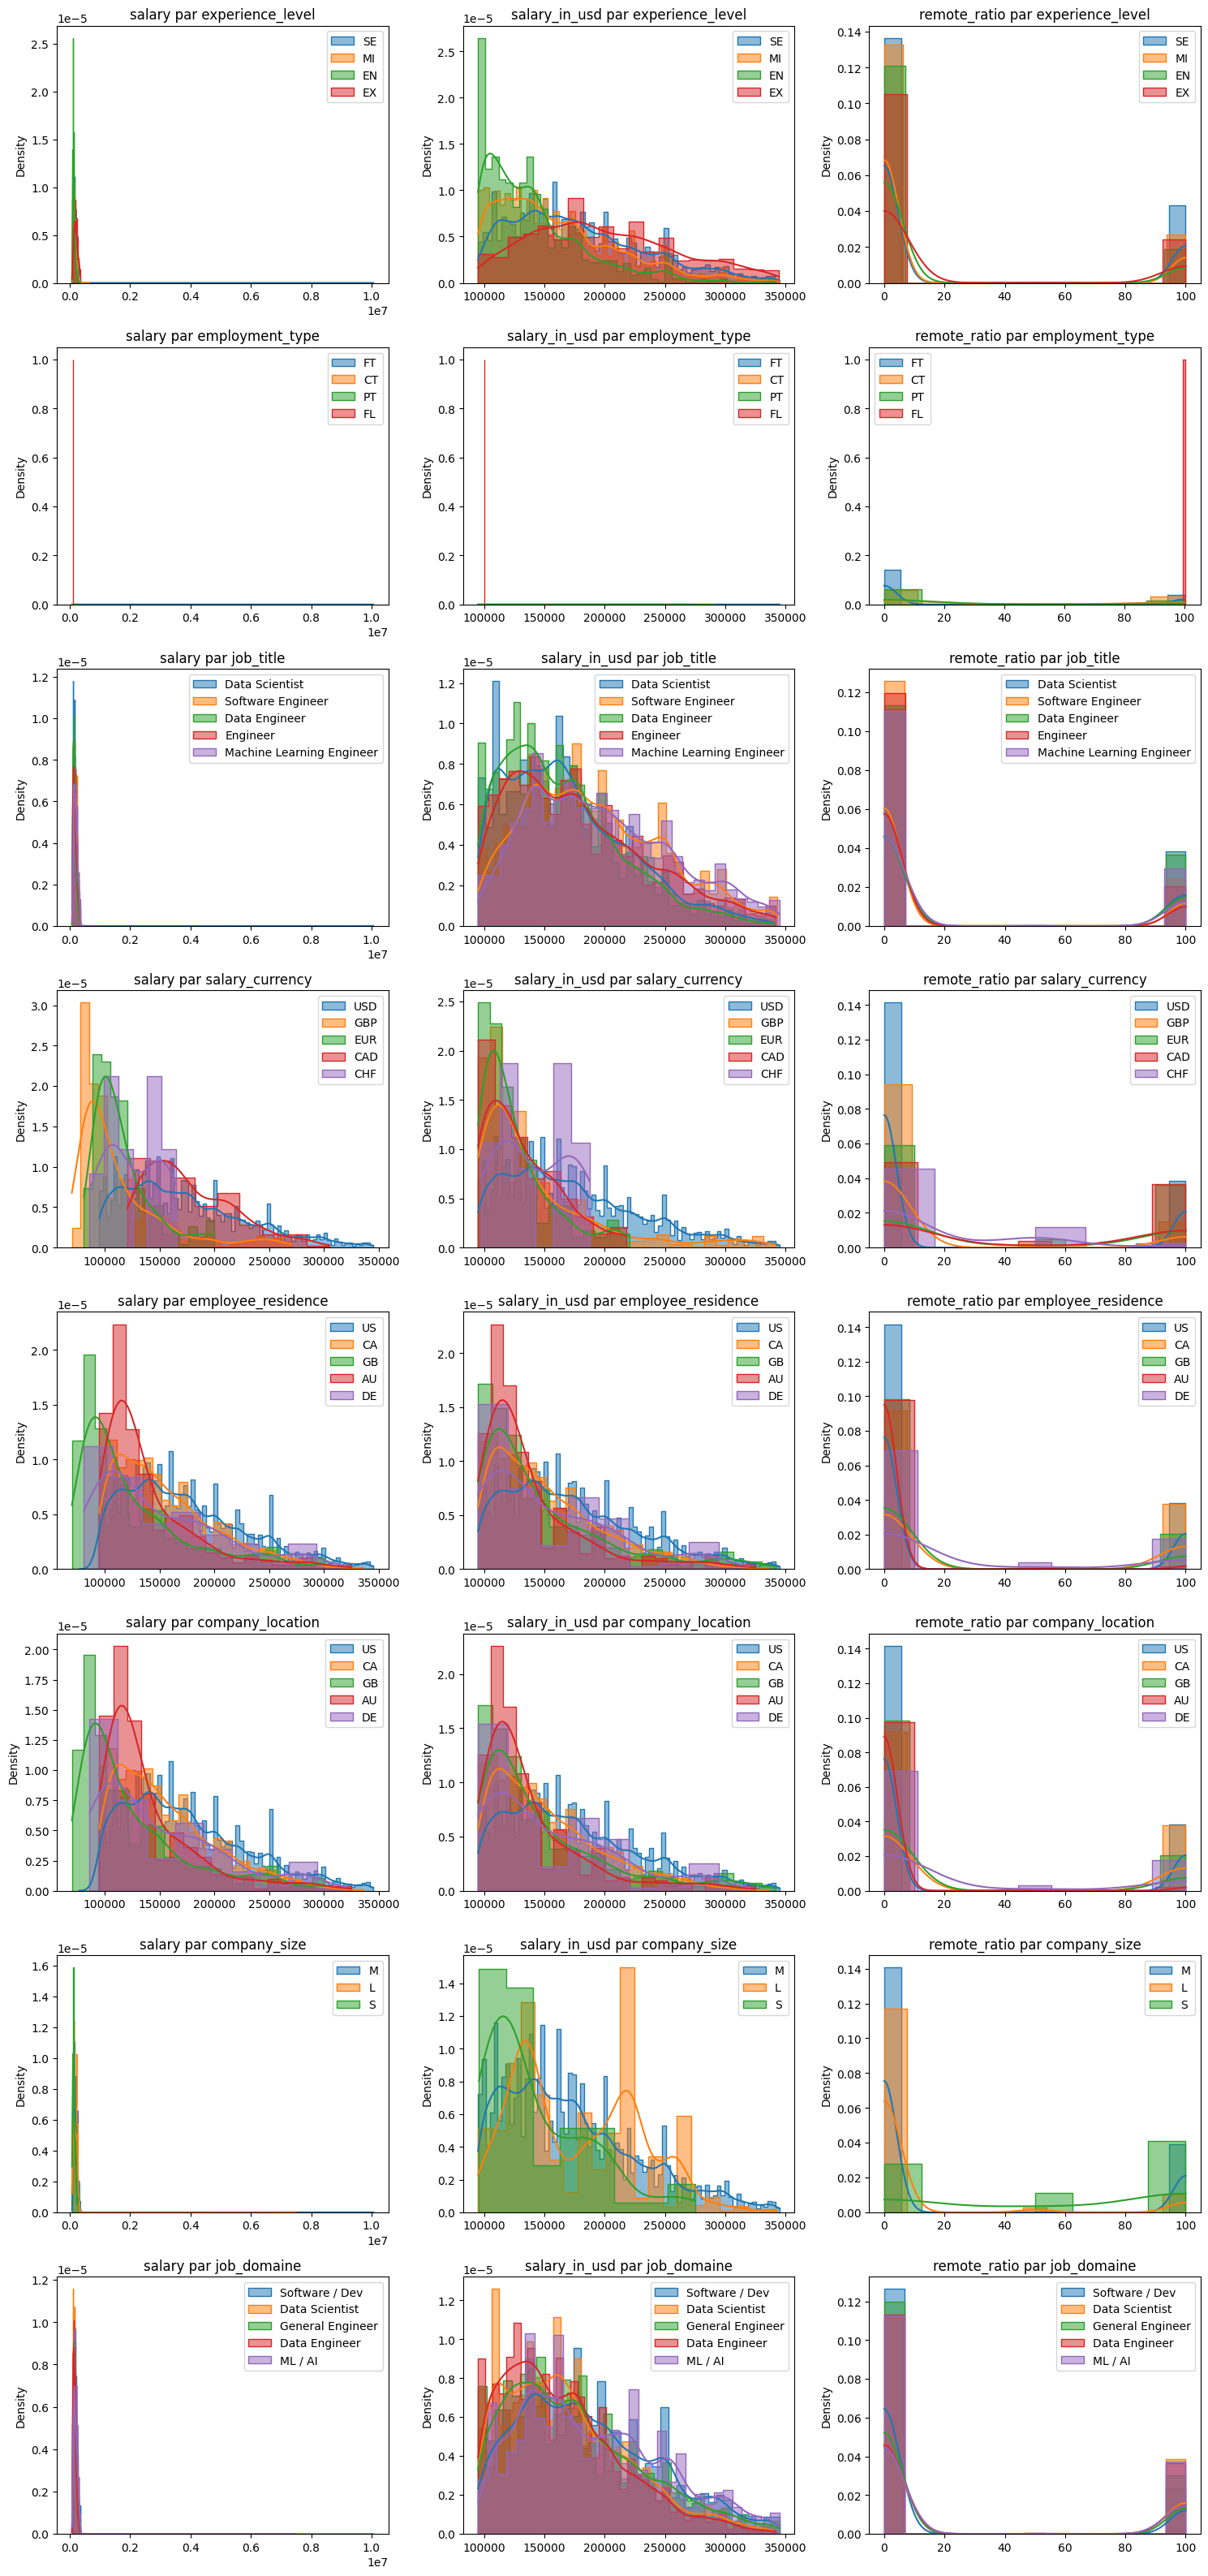

In [80]:
n_rows = len(liste_columns_cat)
n_cols = len(['salary', 'salary_in_usd', 'remote_ratio'])

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

for i, cat in enumerate(liste_columns_cat):
    for j, num in enumerate(['salary', 'salary_in_usd', 'remote_ratio']):
        ax = axes[i, j]
        # On restreint au top 5 catégories
        top_values = data_global_clean[cat].value_counts().nlargest(5).index
        for val in top_values:
            sns.histplot(
                data=data_global_clean[data_global_clean[cat] == val],
                x=num,
                kde=True,
                label=str(val),
                ax=ax,
                element='step',  # meilleure superposition
                stat='density',
                common_norm=False
            )
        ax.set_title(f'{num} par {cat}')
        ax.set_xlabel('')
        ax.legend()

plt.tight_layout()
plt.show()

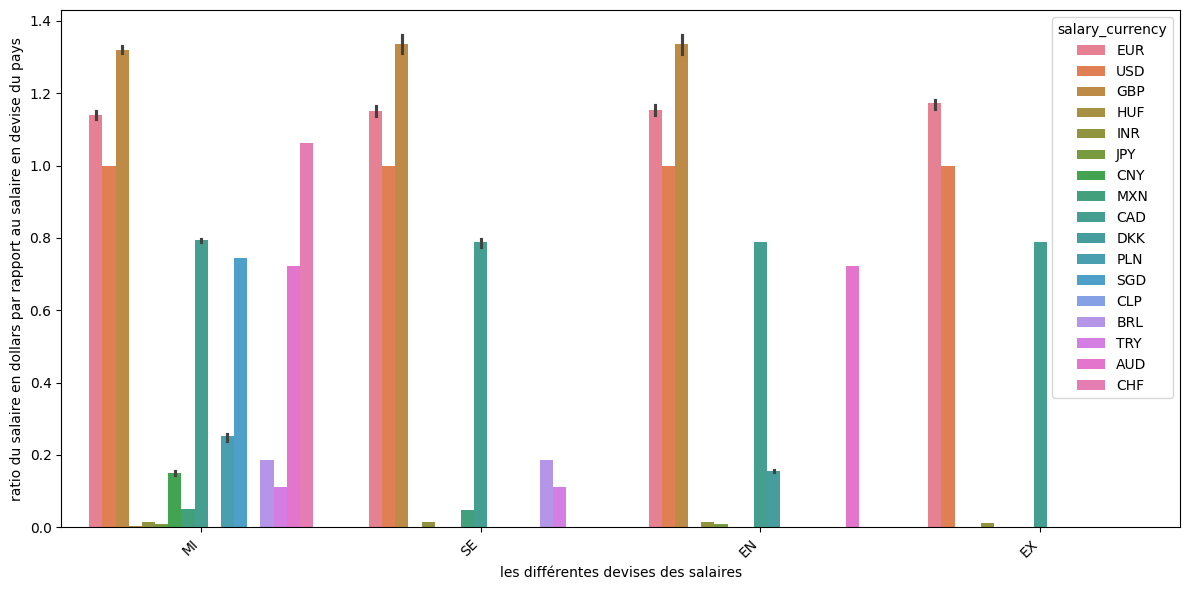

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_global, 
            x='experience_level', 
            y=data_global['salary_in_usd']/data_global['salary'], 
            hue='salary_currency'
            )
plt.xticks(rotation=45, ha='right')
plt.xlabel('les différentes devises des salaires')
plt.ylabel('ratio du salaire en dollars par rapport au salaire en devise du pays')
plt.tight_layout()
plt.show()

In [81]:
description_dataframe(data_global_clean)

description du dataframe
-colonnes :  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'job_domaine'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 101896 entries, 5 to 114433
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           101896 non-null  int64 
 1   experience_level    101896 non-null  object
 2   employment_type     101896 non-null  object
 3   job_title           101896 non-null  object
 4   salary              101896 non-null  int64 
 5   salary_currency     101896 non-null  object
 6   salary_in_usd       101896 non-null  int64 
 7   employee_residence  101896 non-null  object
 8   remote_ratio        101896 non-null  int64 
 9   company_location    101896 non-null  object
 10  company_size        101896 non-null  

# 3- tables de fait et de dimensions

In [84]:
# définir les colonnes de dimensions
dimensions_cols = [
    'work_year', 
    'experience_level', 
    'employment_type',
    'job_title',
    'salary_currency',
    'employee_residence',
    'remote_ratio',
    'company_location', 
    'company_size', 
    'job_domaine'
]

# créer les tables de dimensions
dimension_tables = {}
for col in dimensions_cols:
    dim_table = pd.DataFrame({col: data_global_clean[col].drop_duplicates().sort_values().reset_index(drop=True)})
    dim_table[f"{col}_id"] = dim_table.index + 1
    dimension_tables[col] = dim_table

# merge avec la table de fait
fact_table = data_global_clean.copy()
for col in dimensions_cols:
    fact_table = fact_table.merge(dimension_tables[col], on=col, how='left')

# garder uniquement les colonnes de faits + IDs des dimensions
fact_table_final = fact_table[['salary', 'salary_in_usd'] + [f"{col}_id" for col in dimensions_cols]]



In [91]:
for element in dimension_tables : 
    # print(dimension_tables[element])
    dimension_tables[element].to_csv(f"{element}.csv", index=False)
    # break

In [92]:
fact_table_final.to_csv('table_fait.csv', index=False)

In [94]:
null_v_df(fact_table_final)

la dataframe, sa taille : 101896 lignes et 12 colonnes 
salary: 0 valeurs nulles
salary_in_usd: 0 valeurs nulles
work_year_id: 0 valeurs nulles
experience_level_id: 0 valeurs nulles
employment_type_id: 0 valeurs nulles
job_title_id: 0 valeurs nulles
salary_currency_id: 0 valeurs nulles
employee_residence_id: 0 valeurs nulles
remote_ratio_id: 0 valeurs nulles
company_location_id: 0 valeurs nulles
company_size_id: 0 valeurs nulles
job_domaine_id: 0 valeurs nulles
